# HW_02_Unsupervised_Learning

### Subject: Machine Learning  
### Topic: Unsupervised Learning – Clustering & Dimensionality Reduction  
### Dataset: Mall_Customers.csv  
### Group Members:
- AJANA Oumaima
- BOUMCHICH Maroua
- EL MAKOUDI Ouafae

---

### Algorithms Applied:
1. **Hierarchical Clustering**
2. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**
3. **PCA (Principal Component Analysis)**

---

### Workflow Steps:
1- Import and preprocess the `Mall_Customers` dataset  
2- Select the features we care about (Anual income, Spending score)
3- Visualize data distribution  
4- Apply and visualize each algorithm:
  - Hierarchical Clustering with dendrogram and cluster plotting
  - DBSCAN with scaled data and cluster plot (including outliers)
  - PCA for dimensionality reduction and visual projection
    
5- Compare clustering results

# **• Hierarchical Clustering**

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [30]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


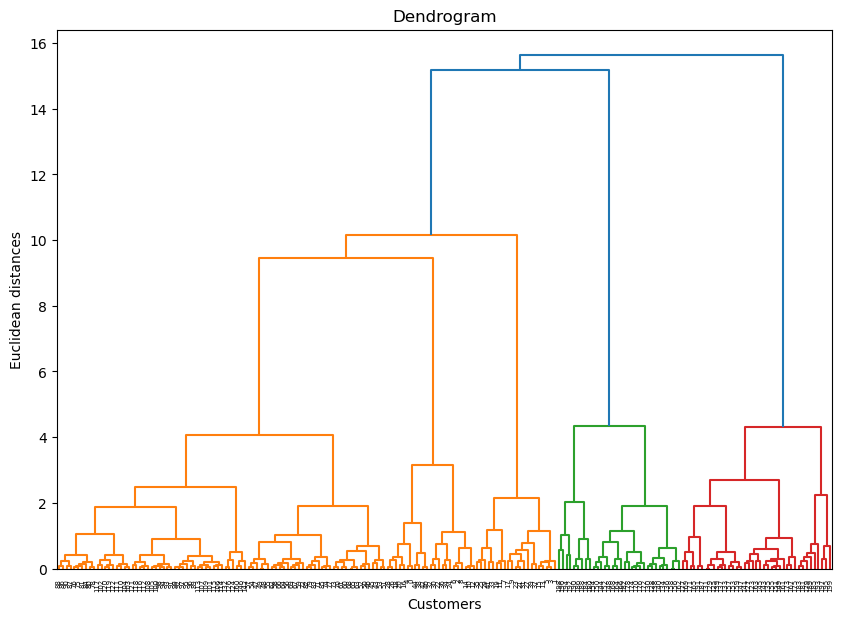

In [32]:
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

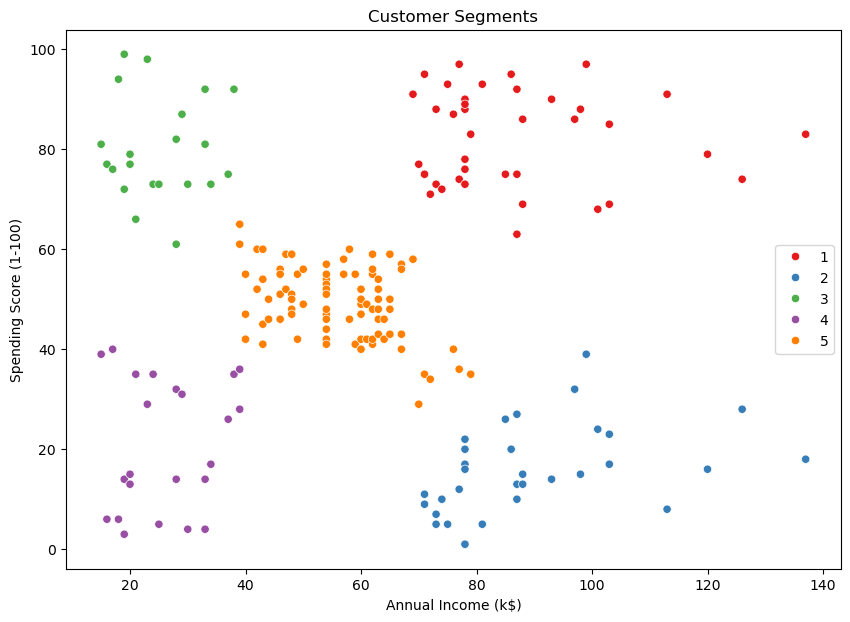

In [34]:
cluster_labels = fcluster(linked, t=5, criterion='maxclust')
data['Cluster'] = cluster_labels

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# **• DBSCAN**

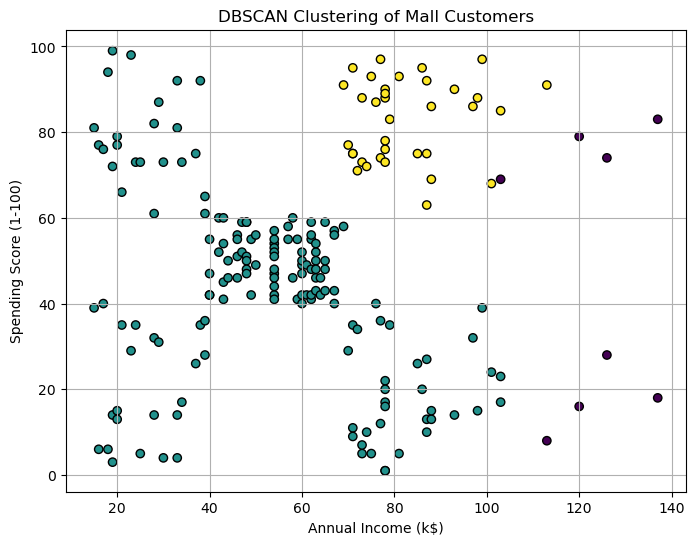

In [36]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_features)
data['Cluster'] = clusters

plt.figure(figsize=(8, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.title('DBSCAN Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

# **• PCA**

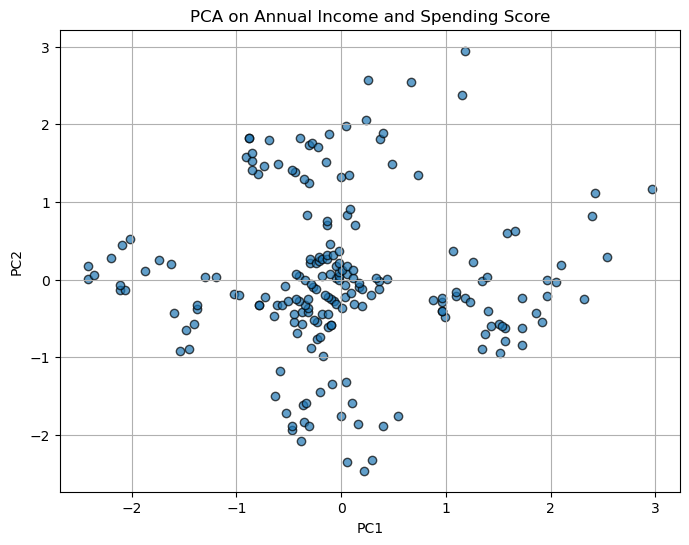

In [38]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, edgecolors='k')
plt.title('PCA on Annual Income and Spending Score')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

# Algorithm Comparison Summary

We applied three different techniques on the `Mall_Customers.csv` dataset using `Annual Income (k$)` and `Spending Score (1-100)`:

| Criteria                | Hierarchical Clustering      | DBSCAN                          | PCA                                 |
|------------------------|------------------------------|----------------------------------|--------------------------------------|
| **Type**               | Clustering (Agglomerative)   | Clustering (Density-Based)      | Dimensionality Reduction             |
| **Main Goal**          | Build a hierarchy of clusters| Group dense areas + detect noise| Reduce data into fewer components    |
| **Outlier Detection**  | No                           | Yes                              | No                                   |
| **Cluster Shape**      | Prefers spherical            | Can find arbitrary shapes        | Not a clustering method              |
| **Parameters**         | Linkage, number of clusters  | `eps`, `min_samples`            | Number of components                 |
| **Visual Output**      | Dendrogram + scatter plot    | Scatter plot (with noise points) | 2D projection of data                |
| **Ease of Use**        | Simple to understand         | Needs tuning                     | Easy and fast                        |
| **Result (on dataset)**| 5 clusters                   | 3–4 clusters + some noise        | Helped visualize data in 2D          |

---

## Conclusion

- **Hierarchical** gave us clear and structured groupings.
- **DBSCAN** showed flexible clusters and identified outliers.
- **PCA** reduced the data for better visualization, but did not cluster by itself.

Each method offers something useful depending on the goal: structure, noise handling, or simplified data.